# 1 Classes

In [204]:
# 1. Create 3 classes: Student, DataSheet and Course

%reload_ext autoreload
%autoreload 2

from WeekExercise3.Course import Course
from WeekExercise3.DataSheet import DataSheet
from WeekExercise3.Student import Student
import random as rand
import csv

# 7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of 
# course names), grades, img_url

def create_students(number_of_students):
    first_names = ['Timothy', 'Josephine', 'Patrick', 'Jens', 'Paul', 'Bertram', 'Sofus', 'Emil']
    last_names = ['Rasmussen', 'Bue', 'Stoltzner', 'Olsen', 'Jensen', 'Poulsen', 'Sten', 'Fredriksen']
    courses = ["Danish", "English", "German"]
    grades = [-3, 0, 2, 4, 7, 10, 12]
    ects = [5, 10]
    teachers = ["TB", "JB", "OL"]
    _students = []
    
    #Creating random combinations with the given data
    
    for i in range(number_of_students):
        student_courses = []
        for index, course in enumerate(courses):
            student_courses.append(Course(course, "A1", teachers[index], rand.choice(ects), rand.choice(grades)))

        _students.append(Student("{} {}".format(first_names[rand.randint(0, len(first_names)-1)], 
                last_names[rand.randint(0, len(last_names)-1)]), rand.choice(["Male", "Female"]), 
                DataSheet(student_courses), "URL"))

    #Creating a CSV file without empty rows, to make it easier to sort later  
    with open('./students.csv', 'w', newline='') as file:   
        writer = csv.writer(file, quoting=csv.QUOTE_NONNUMERIC)

        csv_columns = ['student_name', 'gender', 'course_name','teacher', 'ects', 'classroom', 'grade', 'img_url']

        writer.writerow(csv_columns)
        for _student in _students:
            for course in _student.data_sheet.courses:
                writer.writerow([_student.name, _student.gender, course.name, course.teacher, course.ECTS,
                    course.classroom, course.grade, _student.image_url])
    

In [205]:
# Code for generating the core data in CSV file, used once

create_students(8)

Created student Patrick Poulsen
Created student Bertram Jensen
Created student Emil Jensen
Created student Patrick Rasmussen
Created student Bertram Olsen
Created student Timothy Sten
Created student Timothy Fredriksen
Created student Josephine Poulsen


In [206]:
students = {}

# 8. Read student data into a list of Students from a csv file:
with open('./students.csv', 'r') as file:
    reader = csv.reader(file)
    #Taking the rows 1 to n, to remove the data description in the dataset
    for row in list(reader)[1:]:
        #If name is not a key in the dictionary, add the key.
        if row[0] not in students:
            students[row[0]] = Student(name=row[0], 
                                       gender=row[1], 
                                       data_sheet=DataSheet([Course(course_name=row[2], 
                                                                    classroom=row[5],
                                                                    teacher=row[3],
                                                                    ECTS=row[4],
                                                                    grade=int(row[6]))]),
                                       image_url=row[7])
        #To add all courses to the dictionary name keys matching students courses will be added, if already registered  
        else:
            students[row[0]].data_sheet.courses.append(Course(course_name=row[2],
                                                              classroom=row[5], 
                                                              teacher=row[3],
                                                              ECTS=row[4],
                                                              grade=int(row[6])))
        
        #Testing data distribution
        #print(students[row[0]].data_sheet.courses)    
        

Created student Patrick Poulsen
Created student Bertram Jensen
Created student Emil Jensen
Created student Patrick Rasmussen
Created student Bertram Olsen
Created student Timothy Sten
Created student Timothy Fredriksen
Created student Josephine Poulsen


In [207]:
# 8(a). Loop through the list and print each student with name, img_url and avg_grade.
    
for student_name in students:
    student = students[student_name]
    print('{}, {}, {}'.format(student.name, student.image_url, student.get_avg_grade()))

Patrick Poulsen, URL, 8.666666666666666
Bertram Jensen, URL, 0.3333333333333333
Emil Jensen, URL, 0.6666666666666666
Patrick Rasmussen, URL, 3.6666666666666665
Bertram Olsen, URL, 2.6666666666666665
Timothy Sten, URL, 2.3333333333333335
Timothy Fredriksen, URL, -2.0
Josephine Poulsen, URL, 9.666666666666666


In [208]:
# 8(b). Sort the list by avg_grade
        
sorted_avg_student = {}

for student in students:
    sorted_avg_student[student] = students[student].get_avg_grade()

sorted_avg_student = {student_name: average_grade for student_name, average_grade in sorted(sorted_avg_student.items(),
                                                                                     key=lambda item: item[1])}
print(sorted_avg_student)

{'Timothy Fredriksen': -2.0, 'Bertram Jensen': 0.3333333333333333, 'Emil Jensen': 0.6666666666666666, 'Timothy Sten': 2.3333333333333335, 'Bertram Olsen': 2.6666666666666665, 'Patrick Rasmussen': 3.6666666666666665, 'Patrick Poulsen': 8.666666666666666, 'Josephine Poulsen': 9.666666666666666}


Text(0.5, 1.0, 'Avg Grade for Students')

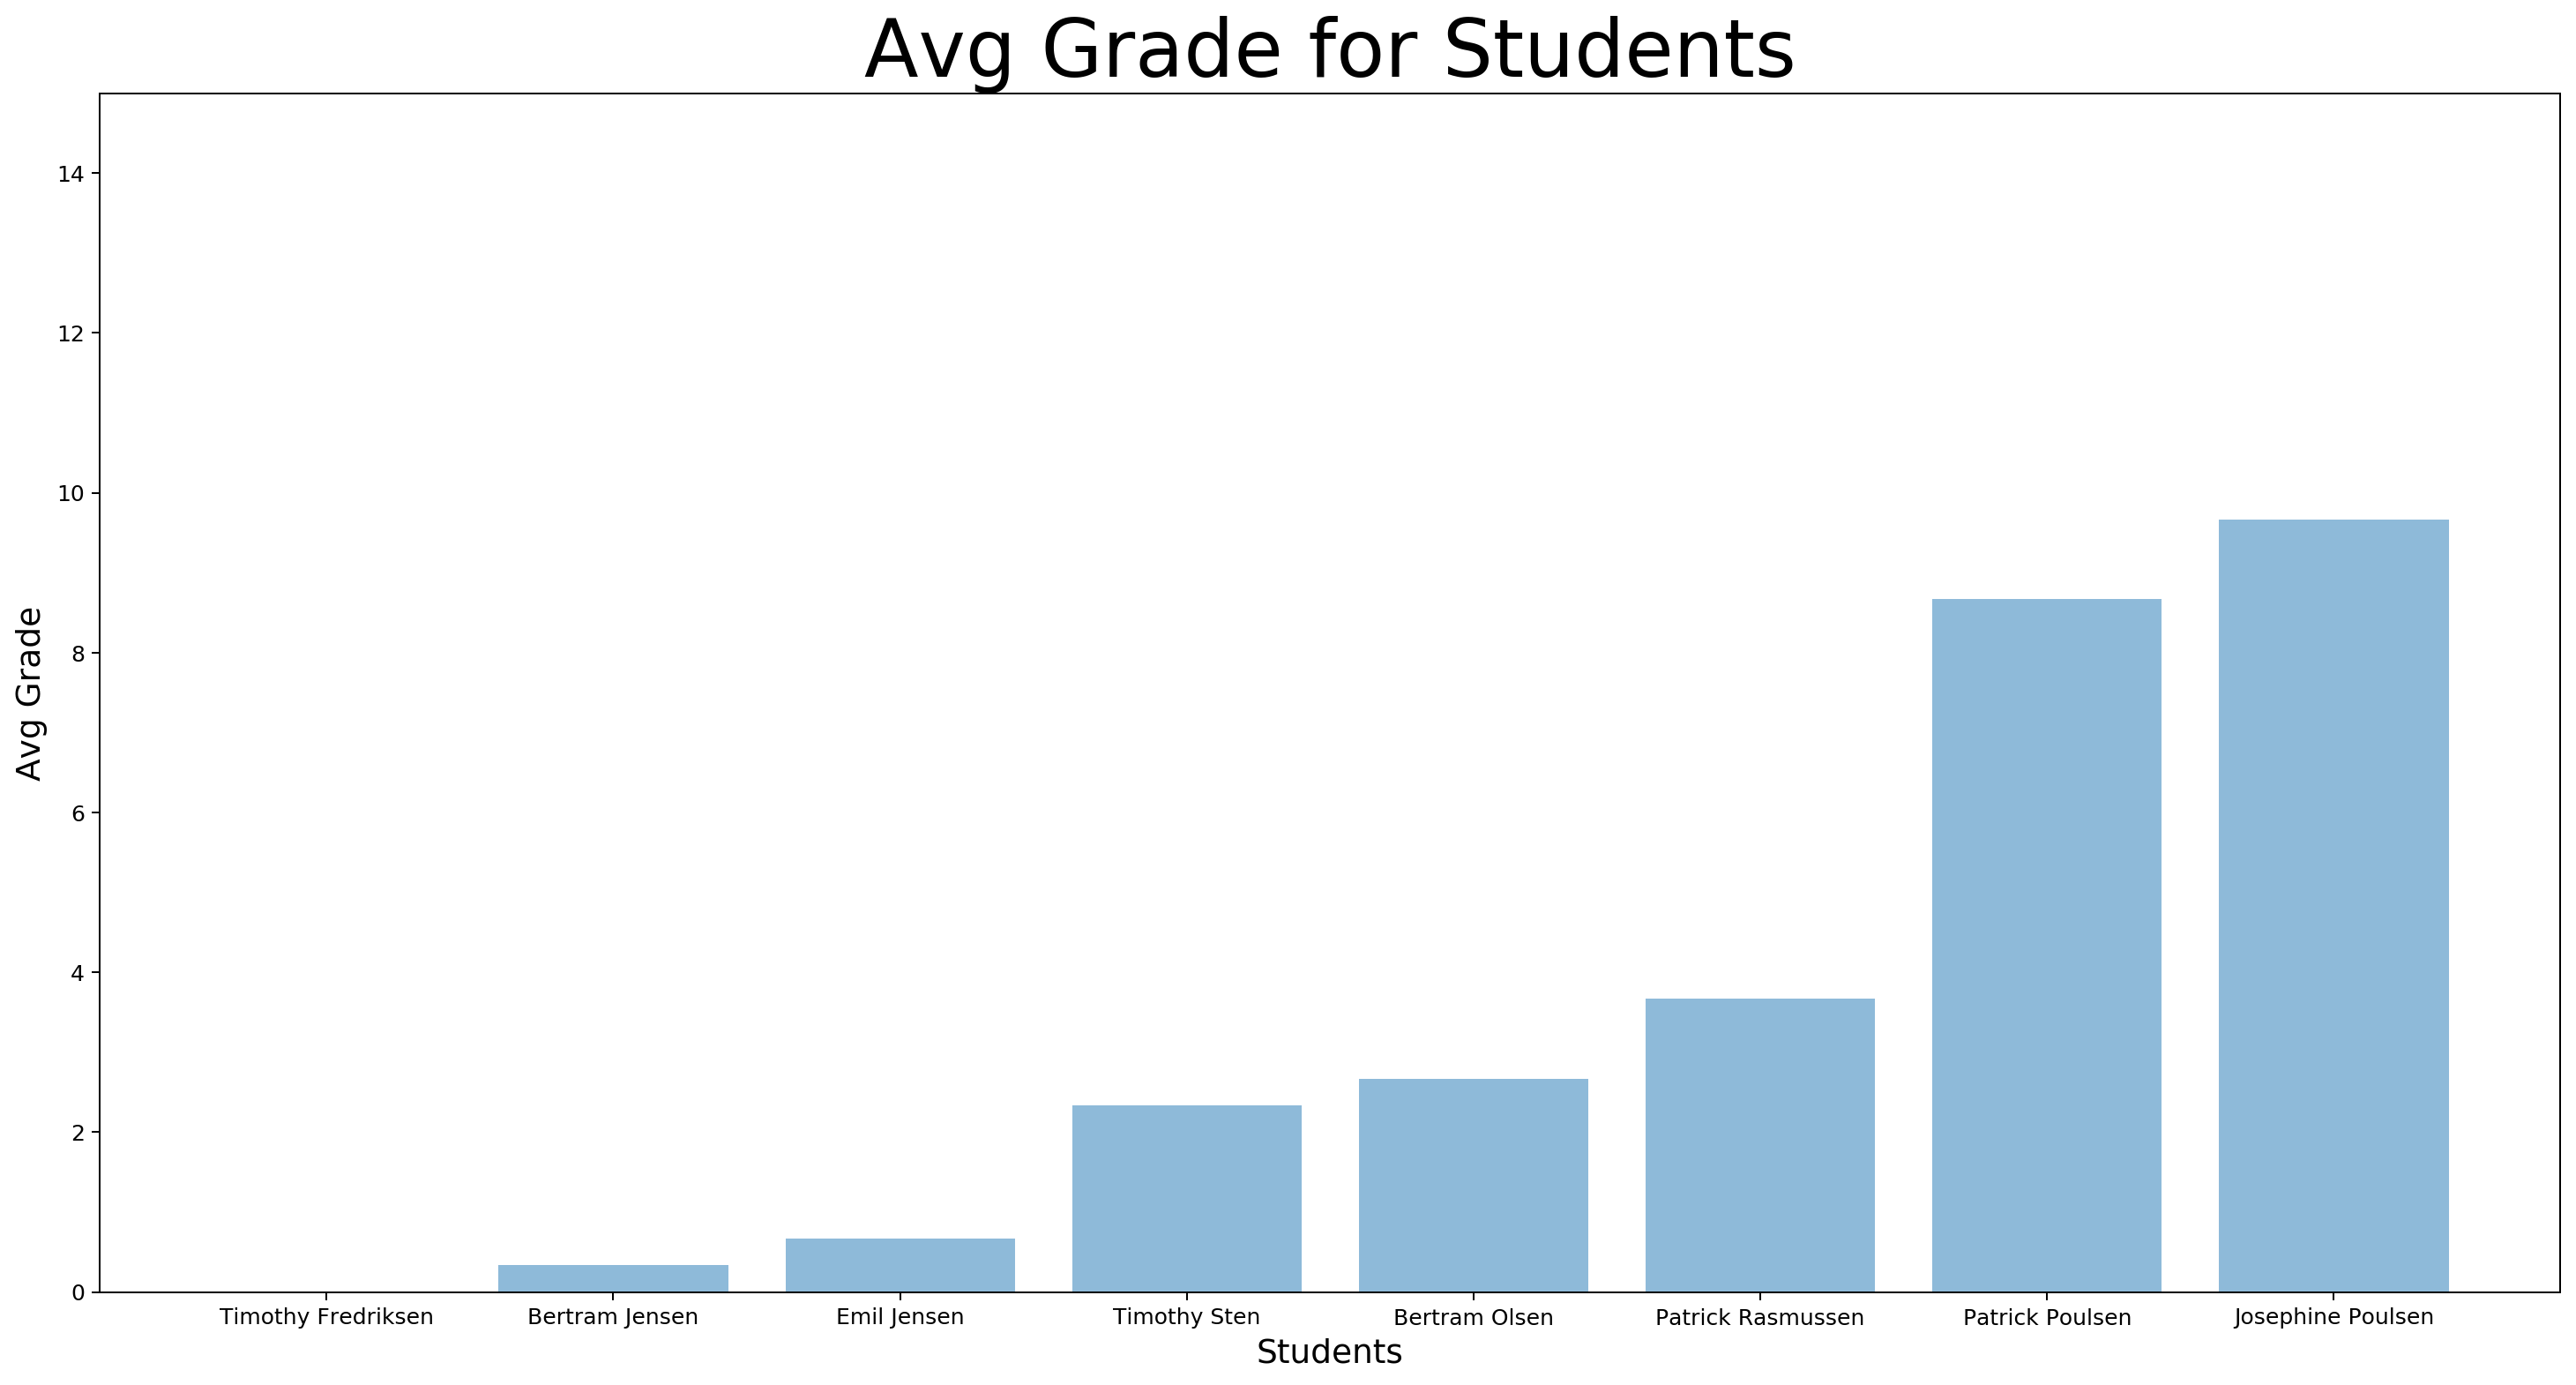

In [209]:
# 8(c). create a bar chart with student_name on x and avg_grade on y-axis

import matplotlib.pyplot as plt


# The average grade values
x_bar = sorted_avg_student.values()

# The names of the students
y_bar = sorted_avg_student.keys()

# Plotting the figure
plt.figure(num=None, figsize=(20, 10), dpi=180, facecolor='w', edgecolor='k')

# Creating the bars from the data
plt.bar(y_bar, x_bar, align='center', alpha=0.5)

# Editing the axes
axes = plt.gca()
axes.set_ylim([0, 15])

# Adding a titles to the graph
plt.xlabel("Students", fontsize=15)
plt.ylabel("Avg Grade", fontsize=15)
plt.title('Avg Grade for Students', fontsize=36)

Text(0, 0.5, 'ECTS Progress')

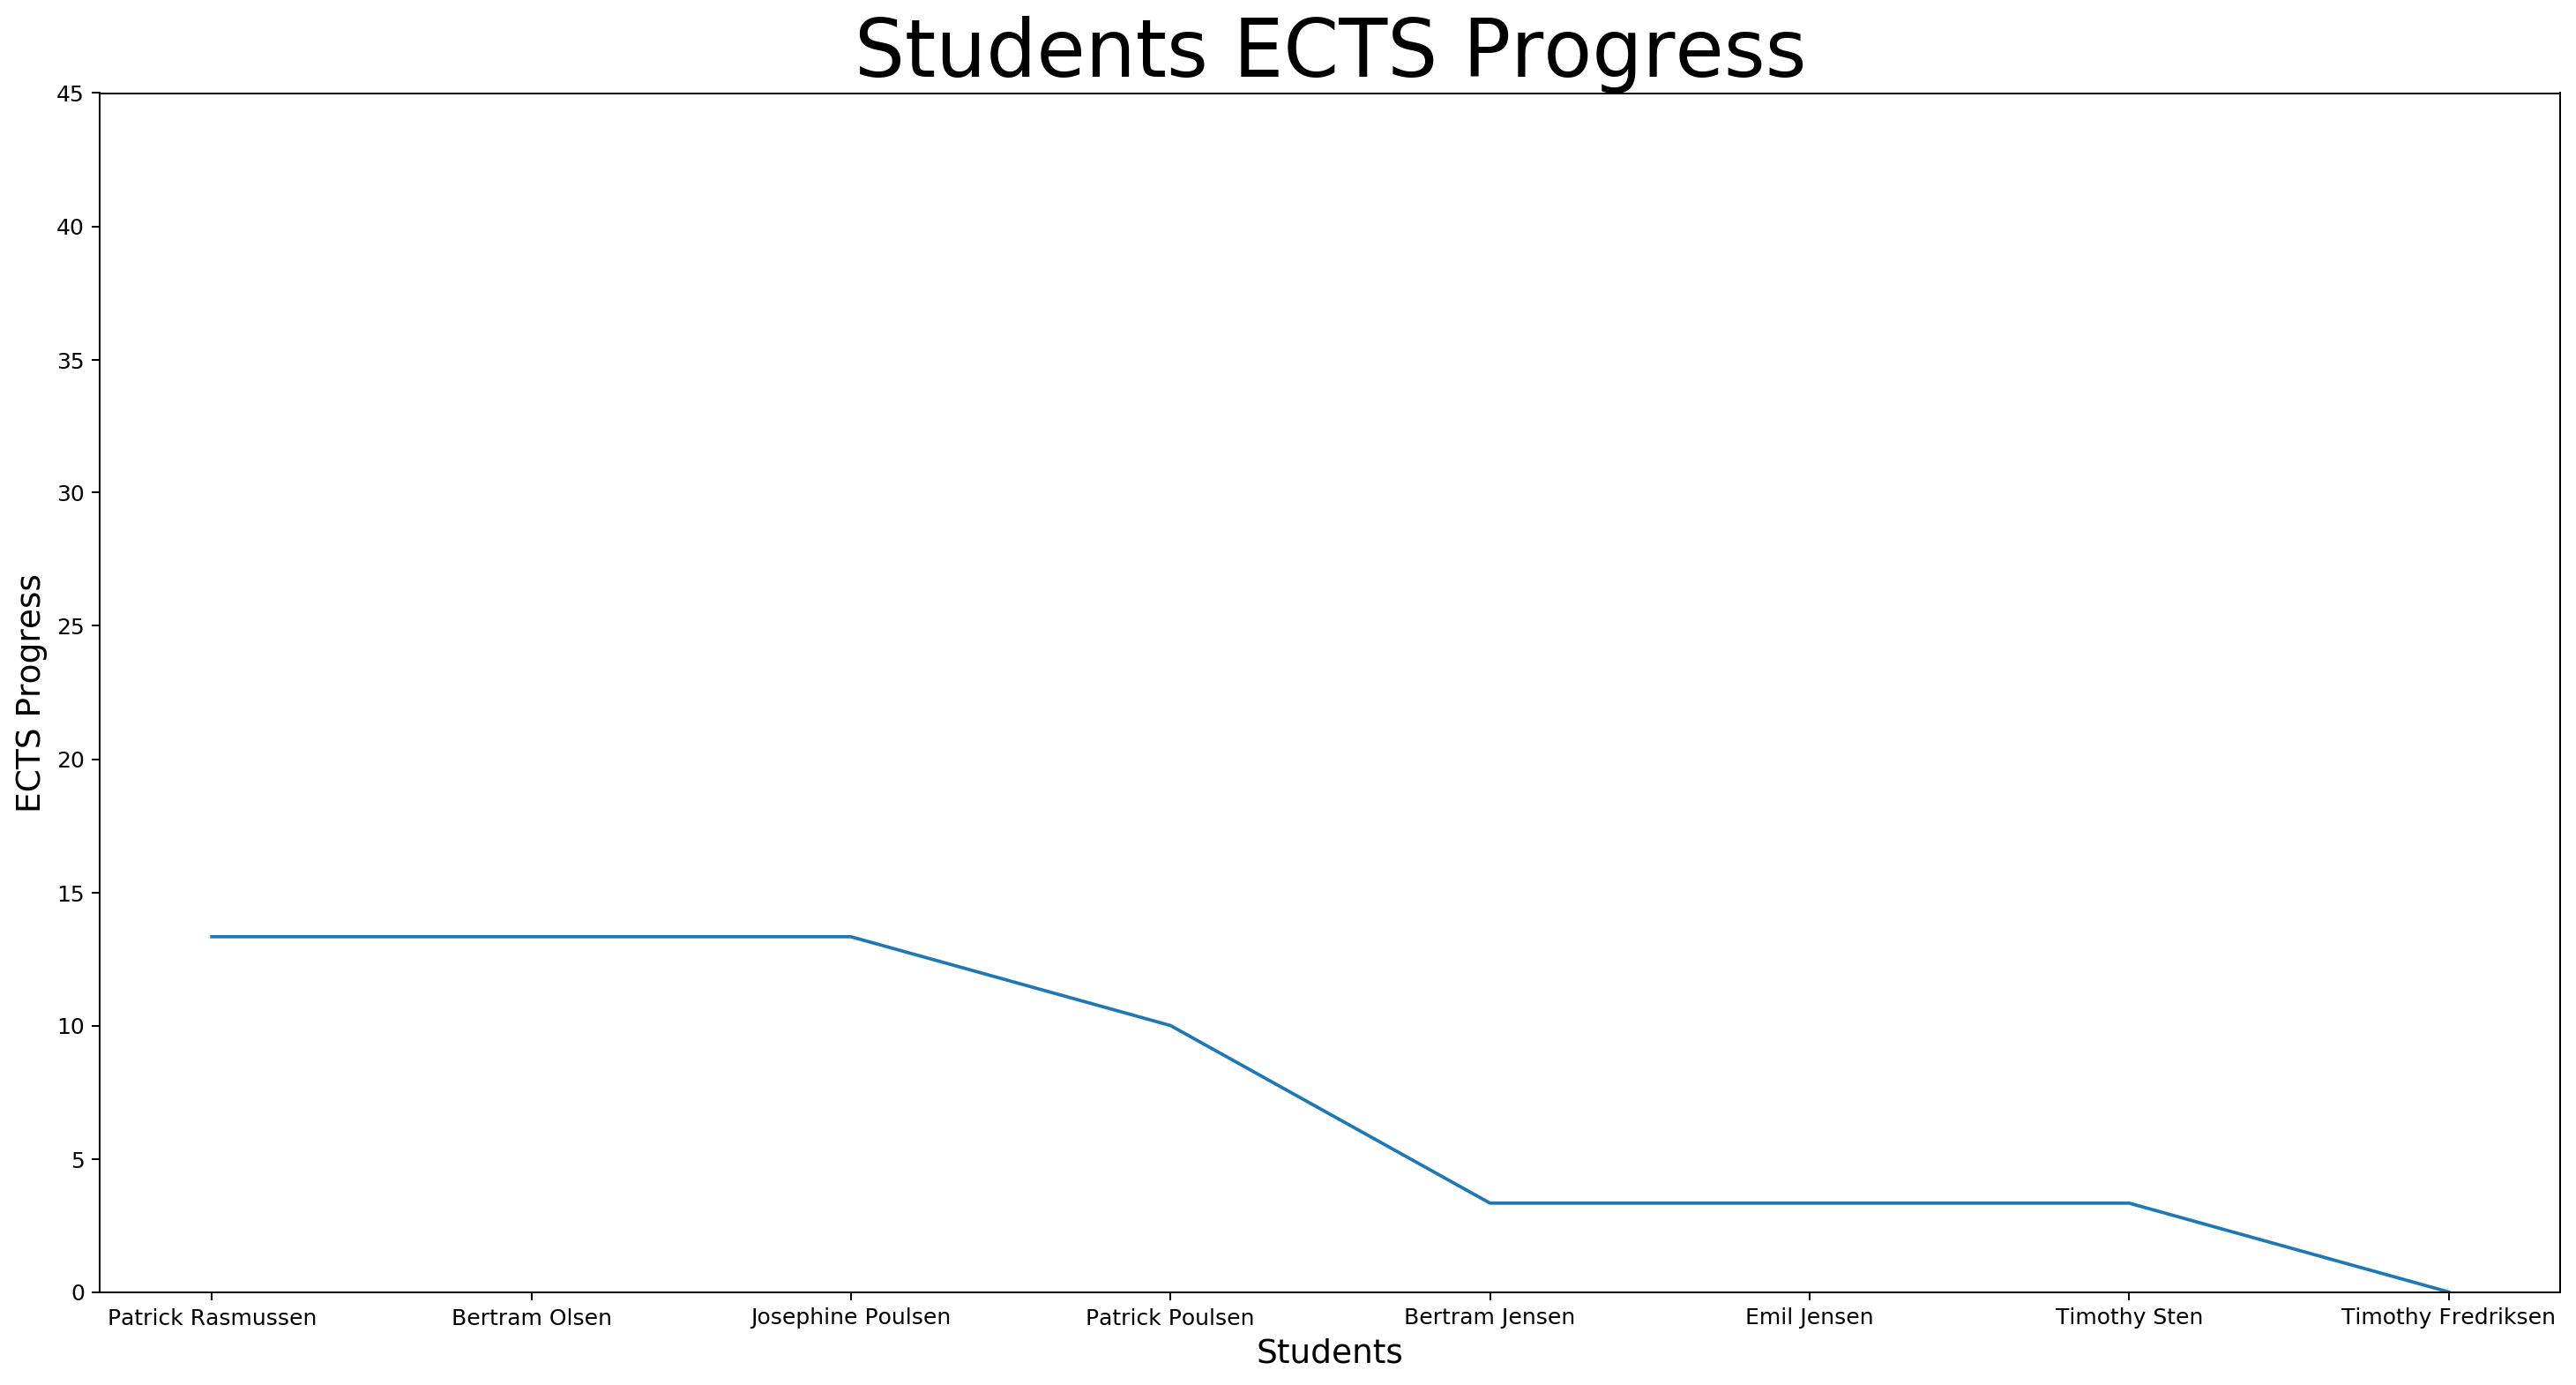

In [210]:
# 10. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis.
# (e.g. make 10 categories from 0-100%)

progress = {}

for student in students:
    progress[student] = students[student].get_progression()

progress = {student_name: ects_progress for student_name, ects_progress in sorted(progress.items(), key=lambda item: item[1], reverse=True)}

student_progress = list(progress.values())

student_names = list(progress.keys())

plt.figure(num=None, figsize=(20, 10), dpi=180, facecolor='w', edgecolor='k')

plt.plot(student_names, student_progress)

axes = plt.gca()
axes.set_ylim([0, 45])

plt.title('Students ECTS Progress', fontsize=36)

plt.xlabel("Students", fontsize=15)
plt.ylabel("ECTS Progress", fontsize=15)

# 2 Exceptions

In [211]:
# 1. Create a function that can take a list of students and return the 3 students closest to completing their study.

def get_3_students_closest_to_finish():
    
    students_ctf = sorted(progress, key=progress.get, reverse=True)[:3]
    
    # 2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
    
    if len(students_ctf) < 3:
        
        raise NotEnoughStudentsException('Not Enough Students')
        
    else:
        return students_ctf
  
# https://realpython.com/python-kwargs-and-args/
  
class NotEnoughStudentsException(ValueError):
    def __init__(self, *error):
        ValueError.__init__(self, *error)  

get_3_students_closest_to_finish()
    

['Patrick Rasmussen', 'Bertram Olsen', 'Josephine Poulsen']

In [212]:
# 3. Create another function that can create a csv file with 3 students closest to completion
# https://realpython.com/python-kwargs-and-args/

def stud_closest_completion(*top_students):

    #Creating a CSV file without empty rows, to make it easier to sort later  
    with open('./top_complete.csv', 'w', newline='') as file:   
        writer = csv.writer(file, quoting=csv.QUOTE_ALL)
        csv_columns = ['student_name']
        writer.writerow(csv_columns)
        for _student in top_students:
            writer.writerow(_student)
 
candidates = get_3_students_closest_to_finish()

stud_closest_completion(candidates)

# 3 Plotting


([<matplotlib.patches.Wedge at 0x22ed770b308>,
 [Text(0.42095177560159885, 1.0162674857624154, '(20%)\nPatrick Rasmussen,\nBertram Olsen,\nJosephine Poulsen'),
  Text(-0.7778174593052025, -0.7778174593052023, '(10%)\nPatrick Poulsen,\nBertram Jensen,\nEmil Jensen,\nTimothy Sten'),
  Text(1.0162674857624152, -0.42095177560159946, '(0%)\nTimothy Fredriksen')],
 [Text(0.22961005941905388, 0.5543277195067721, '37.5%'),
  Text(-0.4242640687119286, -0.42426406871192845, '50.0%'),
  Text(0.5543277195067718, -0.2296100594190542, '12.5%')])

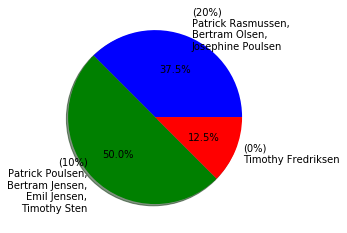

In [218]:
# 1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS 
# percentage categories (10%, 20%, ...)

import math

procent = {}

for prog in progress:
    t = int(math.ceil(progress[prog] / 10.0)) * 10
    procent[t] = procent.get(t, 0) + 1

sizes = []
labels = []
for i in procent:
    sizes.append((procent[i] / len(progress)) * 100)
    label = []
    for prog in progress:
        if i == int(math.ceil(progress[prog] / 10.0)) * 10:
            label.append(prog)
    labels.append('({}%)\n'.format(i) + ',\n'.join(label))


colors = ['blue', 'green',  'red']

# Plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

